# Imports

In [57]:
import datetime
import requests, json, csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split, cross_validate

# Coletar dados

In [28]:
def load_json_prop(json, prop):
    value=0
    for uf in json:
        value += uf[prop]
    return value

In [31]:
def load_data():
    data = []
    
    date = datetime.date(2020, 3, 1)
    
    while date < datetime.date.today():
        response = requests.get("https://covid19-brazil-api.now.sh/api/report/v1/brazil/" + f"{date.year}" + f"{date.month:02d}" + f"{date.day:02d}")
        
        if response.status_code != 200:
            date = date + datetime.timedelta(days=1)
            continue
        
        responseJson = json.loads(response.text)["data"]
        cases = load_json_prop(responseJson, "cases")
        deaths = load_json_prop(responseJson, "deaths")
        if cases == 0:
            date = date + datetime.timedelta(days=1)
            continue
        
        row = []
        row.append(date)
        row.append(cases)
        row.append(deaths)
        data.append(row)
        
        date = date + datetime.timedelta(days=1)

    return data

# Salvar dados em arquivo

In [32]:
data = load_data()

with open('database.csv', mode='w') as fl:
    fl = csv.writer(fl, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)

    fl.writerow(['Date', 'Cases', 'Deaths'])

    for evidences in data:
        fl.writerow(evidences)

# Visualizar dados

In [50]:
df = pd.read_csv('database.csv', index_col=0, parse_dates=True)
df['Year'] = df.index.year
df['Month'] = df.index.month
df['New Cases'] = df['Cases'].diff()
df['New Deaths'] = df['Deaths'].diff()
df.tail(3)

,Cases,Deaths,Year,Month,New Cases,New Deaths
Date,,,,,,
2021-12-07,22157726,616018,2021,12,10250.0,274.0
2021-12-08,22167781,616251,2021,12,10055.0,233.0
2021-12-09,22177059,616457,2021,12,9278.0,206.0


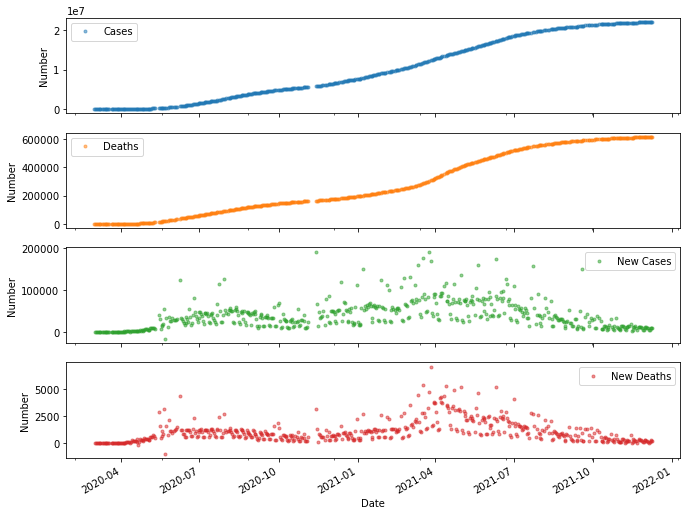

In [51]:
cols_plot = ['Cases', 'Deaths', 'New Cases', 'New Deaths']
axes = df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Number')

# Construir o modelo

In [72]:
# model description
model = lm.LinearRegression()

# train
evidences = np.array(df.index).reshape(-1, 1)
labels = np.array(df["Cases"]).reshape(-1, 1)
train_x, test_x, train_y, test_y = train_test_split(evidences, labels)
model.fit(train_x, train_y)

LinearRegression()

# Avaliar o modelo

In [79]:
test_x

array([['2020-06-21T00:00:00.000000000'],
       ['2021-02-01T00:00:00.000000000'],
       ['2020-10-03T00:00:00.000000000'],
       ['2021-09-07T00:00:00.000000000'],
       ['2020-05-17T00:00:00.000000000'],
       ['2020-06-30T00:00:00.000000000'],
       ['2021-05-19T00:00:00.000000000'],
       ['2020-11-03T00:00:00.000000000'],
       ['2020-03-13T00:00:00.000000000'],
       ['2021-04-13T00:00:00.000000000'],
       ['2020-10-28T00:00:00.000000000'],
       ['2020-05-19T00:00:00.000000000'],
       ['2020-10-15T00:00:00.000000000'],
       ['2021-03-08T00:00:00.000000000'],
       ['2020-09-30T00:00:00.000000000'],
       ['2020-07-22T00:00:00.000000000'],
       ['2021-01-04T00:00:00.000000000'],
       ['2021-11-25T00:00:00.000000000'],
       ['2020-07-24T00:00:00.000000000'],
       ['2020-07-12T00:00:00.000000000'],
       ['2021-11-10T00:00:00.000000000'],
       ['2020-09-21T00:00:00.000000000'],
       ['2020-09-24T00:00:00.000000000'],
       ['2021-10-10T00:00:00.00000

In [78]:
predicts = model.predict(test_x)
result = pd.DataFrame()
result['Predicts'] = predicts
result['Real'] = test_y
result

TypeError: invalid type promotion